In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [26]:
crimeDf = pd.read_csv("crime-housing-austin-2015.csv")
zipDf = pd.read_csv("AustinZipCodes.csv")

In [8]:
display(crimeDf)
display(crimeDf.columns)

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,...,80%,15%,99%,67%,3%,73%,207%,96%,$590,39%
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,...,70%,15%,99%,51%,104%,20%,64%,21%,$747,33%
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,...,67%,12%,97%,26%,26%,31%,68%,44%,$747,32%
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,6575 DECKER LN,N,10-Feb-16,C,78724.0,...,78%,84%,100%,96%,208%,37%,46%,21%,$786,40%


Index(['Key', 'Council_District', 'Highest_Offense_Desc',
       'Highest_NIBRS_UCR_Offense_Description', 'Report_Date', 'Location',
       'Clearance_Status', 'Clearance_Date', 'District', 'Zip_Code_Crime',
       'Census_Tract', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code_Housing',
       'Populationbelowpovertylevel', 'Medianhouseholdincome',
       'Non-WhiteNon-HispanicorLatino', 'HispanicorLatinoofanyrace',
       'Populationwithdisability', 'Unemployment',
       'Largehouseholds(5+members)',
       'Homesaffordabletopeopleearninglessthan$50000',
       'Rentalsaffordabletopeopleearninglessthan$25000',
       'Rent-restrictedunits', 'HousingChoiceVoucherholders', 'Medianrent',
       'Medianhomevalue', 'Percentageofrentalunitsinpoorcondition',
       'Percentchangeinnumberofhousingunits2000-2012',
       'Ownerunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageartist',
       'Ownerunits

In [ ]:
...I'm thinking of seeing if being richer means less crime. And if so, what is the threshold where crime rates go down.
I will be doing this by comparing the different types of workers...

I'm also thinking of seeing if being in a richer house means you get less clearances. I will also need to examine what type of crime was being committed.

...This one seems more interesting "I'm thinking of doing change in median home value vs. thief. Is it really worth getting a a house that you believe will go up in value a lot in the future?
With this analysis I would also need to see if there is a coorelation between types of crimes"...

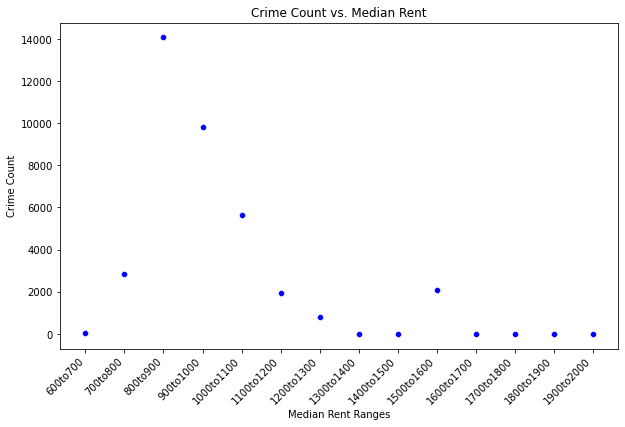

In [58]:
# Get the Rental Units for teacher
# Get the rental Units for tech worker
# get the ownerunits for teacher
# get the owner units for tech worker
# crimeDf['Medianrent'] = crimeDf['Medianrent'].str.replace('$', '').astype('float')
# Set the maximum rent value
max_rent = 2000

# Initialize an empty dictionary to store the counts for each range
rent_counts = {}

# Iterate through each 300-dollar increment up to the maximum rent
for rent_limit in range(700, max_rent + 100, 100):
    # Create a key for the current range
    key = f'{rent_limit - 100}to{rent_limit}'
    
    # Calculate the count for the current range
    count = crimeDf[(crimeDf.Medianrent >= rent_limit - 100) & (crimeDf.Medianrent < rent_limit)].Medianrent.count()
    
    # Store the count in the dictionary
    rent_counts[key] = count

# Extract the keys and values from the rent_counts dictionary
keys = list(rent_counts.keys())
values = list(rent_counts.values())

# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=keys, y=values, color='blue')
plt.title('Crime Count vs. Median Rent')
plt.xlabel('Median Rent Ranges')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# sns.scatterplot(x=crimeDf.Medianrent, y=)
# How do I seperate the data between a tech worker and a teacher? Maybe do it by median household income...

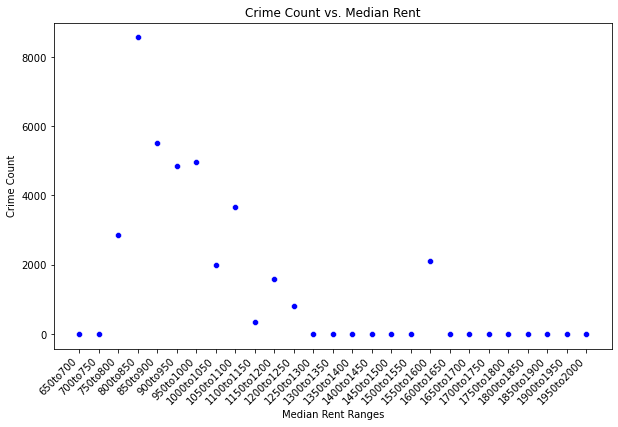

In [78]:
# Set the maximum rent value
max_rent = 2000

# Initialize an empty dictionary to store the counts for each range
rent_counts = {}

# Iterate through each 300-dollar increment up to the maximum rent
for rent_limit in range(700, max_rent + 50, 50):
    # Create a key for the current range
    key = f'{rent_limit - 50}to{rent_limit}'
    
    # Calculate the count for the current range
    count = crimeDf[(crimeDf.Medianrent >= rent_limit - 50) & (crimeDf.Medianrent < rent_limit)].Medianrent.count()
    
    # Store the count in the dictionary
    rent_counts[key] = count

# Extract the keys and values from the rent_counts dictionary
keys = list(rent_counts.keys())
values = list(rent_counts.values())

# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=keys, y=values, color='blue')
plt.title('Crime Count vs. Median Rent')
plt.xlabel('Median Rent Ranges')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [67]:
weirdAnomoly = crimeDf[(crimeDf.Medianrent >= 1550) & (crimeDf.Medianrent < 1600)]
weirdAnomoly.columns

Index(['Key', 'Council_District', 'Highest_Offense_Desc',
       'Highest_NIBRS_UCR_Offense_Description', 'Report_Date', 'Location',
       'Clearance_Status', 'Clearance_Date', 'District', 'Zip_Code_Crime',
       'Census_Tract', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code_Housing',
       'Populationbelowpovertylevel', 'Medianhouseholdincome',
       'Non-WhiteNon-HispanicorLatino', 'HispanicorLatinoofanyrace',
       'Populationwithdisability', 'Unemployment',
       'Largehouseholds(5+members)',
       'Homesaffordabletopeopleearninglessthan$50000',
       'Rentalsaffordabletopeopleearninglessthan$25000',
       'Rent-restrictedunits', 'HousingChoiceVoucherholders', 'Medianrent',
       'Medianhomevalue', 'Percentageofrentalunitsinpoorcondition',
       'Percentchangeinnumberofhousingunits2000-2012',
       'Ownerunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageartist',
       'Ownerunits

In [70]:
weirdAnomoly.Zip_Code_Crime

25       78701.0
41       78701.0
60       78701.0
61       78701.0
73       78701.0
          ...   
38466    78701.0
38518    78701.0
38545    78701.0
38553    78701.0
38560    78701.0
Name: Zip_Code_Crime, Length: 2103, dtype: float64

I looked it up online and apparently For example, there are more retail establishments in the central part of the zip. Many crimes are committed in retail areas in blocks where few people live.

Series([], Name: Zip_Code_Crime, dtype: float64)

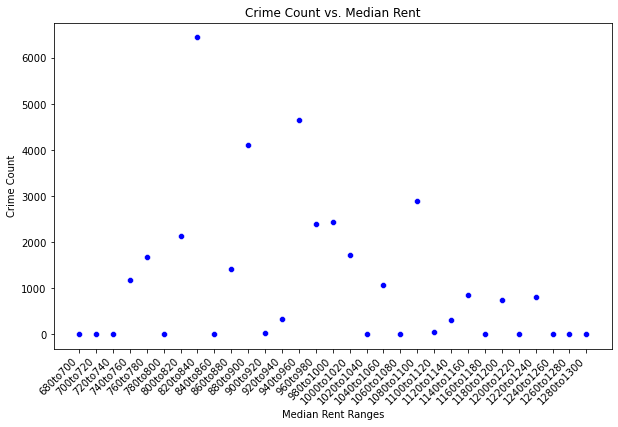

In [90]:
# Set the maximum rent value
max_rent = 1300

# Initialize an empty dictionary to store the counts for each range
rent_counts = {}
keysForTTest = []
# Iterate through each 300-dollar increment up to the maximum rent
for rent_limit in range(700, max_rent + 20, 20):
    # Create a key for the current range
    key = f'{rent_limit - 20}to{rent_limit}'
    keysForTTest.append(max_rent)
    # Calculate the count for the current range
    if rent_limit == 860:
        display(crimeDf[(crimeDf.Medianrent >= rent_limit - 20) & (crimeDf.Medianrent < rent_limit)].Zip_Code_Crime)
    count = crimeDf[(crimeDf.Medianrent >= rent_limit - 20) & (crimeDf.Medianrent < rent_limit)].Medianrent.count()
    
    # Store the count in the dictionary
    rent_counts[key] = count

# Extract the keys and values from the rent_counts dictionary
keys = list(rent_counts.keys())
values = list(rent_counts.values())

# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=keys, y=values, color='blue')
plt.title('Crime Count vs. Median Rent')
plt.xlabel('Median Rent Ranges')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [87]:
stats.ttest_ind(keysForTTest, values)

Ttest_indResult(statistic=0.5804519114950707, pvalue=0.5637836781382588)

### Analysis
There is pvalue after performing the ttest is greater than the .05 suggesting that there is not enough evidence to conclude the rent mean and the number of crimes commited are correlated.
